In [3]:
import pandas as pd
import numpy as np


In [4]:

dataset = {"İsim": ["Mert", "Nilay", "Dogancan", "Omer", "Merve", "Onur"],
          "Soyad": ["Cobanov", "Mertal", "Mavideniz", "Cengiz", "Noyan", "Sahil"],
          "Yas": [24, 22, 24, 23, "bilinmiyor", 23],
          "Sehir": ["Bursa", "Ankara", "Istanbul", np.nan, "Izmir", "Istanbul"],
          "Ulke": ["Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye"],
          "GANO": [np.nan, np.nan, np.nan, np.nan, 3.90, np.nan]}

df = pd.DataFrame(dataset)
df

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24,Bursa,Turkiye,NaN
1,Nilay,Mertal,22,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23,NaN,Turkiye,NaN
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye,3.9
5,Onur,Sahil,23,Istanbul,Turkiye,NaN


In [5]:
df.info()
#string->object oluyor.
#yaş-> bilinmiyor string olduğundan object olmuş oluyor.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   İsim    6 non-null      object 
 1   Soyad   6 non-null      object 
 2   Yas     6 non-null      object 
 3   Sehir   5 non-null      object 
 4   Ulke    6 non-null      object 
 5   GANO    1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 232.0+ bytes


In [6]:
df.isna().sum().sum() # 6 non-value 

6

In [7]:
#axis->column temizle; 3 ten fazla null u olan herhangi bir satırın kolonu sil.
df.dropna(axis=1, how="any", thresh=3)

,İsim,Soyad,Yas,Sehir,Ulke
0,Mert,Cobanov,24,Bursa,Turkiye
1,Nilay,Mertal,22,Ankara,Turkiye
2,Dogancan,Mavideniz,24,Istanbul,Turkiye
3,Omer,Cengiz,23,NaN,Turkiye
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye
5,Onur,Sahil,23,Istanbul,Turkiye


In [8]:
df_2=df.drop(labels=["GANO", "Ulke"],axis=1)
#inplace=True -> df içinde değişiklik uygulamış oluyor.
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24,Bursa
1,Nilay,Mertal,22,Ankara
2,Dogancan,Mavideniz,24,Istanbul
3,Omer,Cengiz,23,NaN
4,Merve,Noyan,bilinmiyor,Izmir
5,Onur,Sahil,23,Istanbul


In [9]:
#df_2["Yas"].replace("bilinmiyor",np.nan, inplace=True)
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24,Bursa
1,Nilay,Mertal,22,Ankara
2,Dogancan,Mavideniz,24,Istanbul
3,Omer,Cengiz,23,NaN
4,Merve,Noyan,bilinmiyor,Izmir
5,Onur,Sahil,23,Istanbul


In [10]:
#df_2["Yas"].fillna(value=df_2["Yas"].mean(), inplace=True)
#df_1["Yas"].fillna(value=df_1["Yas"].mean(), inplace=True)

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

df_2 = df.copy()

df_2["Yas"].replace("bilinmiyor", np.nan, inplace=True)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_2["Yas"] = imp_mean.fit_transform(df_2[["Yas"]])

df_2

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24.0,Bursa,Turkiye,NaN
1,Nilay,Mertal,22.0,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24.0,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23.0,NaN,Turkiye,NaN
4,Merve,Noyan,23.0,Izmir,Turkiye,3.9
5,Onur,Sahil,23.0,Istanbul,Turkiye,NaN


In [12]:
#enterpolasyon
s=pd.Series([0,1,np.nan,3])
print(s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [13]:
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [14]:
from sklearn.impute import KNNImputer

In [15]:
X=[[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [16]:
#ökliden distance almak
imputer=KNNImputer(n_neighbors=2, weights="uniform")
X=imputer.fit_transform(X)

In [17]:
pd.DataFrame(X)

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


In [18]:
df_2["Sehir"]=df["Sehir"].replace(np.nan, "diğer")
df_2

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24.0,Bursa,Turkiye,NaN
1,Nilay,Mertal,22.0,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24.0,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23.0,diğer,Turkiye,NaN
4,Merve,Noyan,23.0,Izmir,Turkiye,3.9
5,Onur,Sahil,23.0,Istanbul,Turkiye,NaN


In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np



In [20]:
df_ss = df_2.copy()

df_ss["Yas_Scaled"] = StandardScaler().fit_transform(df_ss[["Yas"]])

df_ss

,İsim,Soyad,Yas,Sehir,Ulke,GANO,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,Turkiye,NaN,1.212678
1,Nilay,Mertal,22.0,Ankara,Turkiye,NaN,-1.697749
2,Dogancan,Mavideniz,24.0,Istanbul,Turkiye,NaN,1.212678
3,Omer,Cengiz,23.0,diğer,Turkiye,NaN,-0.242536
4,Merve,Noyan,23.0,Izmir,Turkiye,3.9,-0.242536
5,Onur,Sahil,23.0,Istanbul,Turkiye,NaN,-0.242536


In [21]:
print("X_train:", df_ss["Yas"].mean(axis=0), df_ss["Yas"].std(axis=0))

print("X_scaled:", df_ss["Yas_Scaled"].mean(axis=0), df_ss["Yas_Scaled"].std(axis=0))


X_train: 23.166666666666668 0.752772652709081
X_scaled: -1.6930901125533637e-15 1.0954451150103321


In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_mm = df_2.copy()

df_mm["Yas_Scaled"] = MinMaxScaler().fit_transform(df_mm[["Yas"]])

df_mm

,İsim,Soyad,Yas,Sehir,Ulke,GANO,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,Turkiye,NaN,1.0
1,Nilay,Mertal,22.0,Ankara,Turkiye,NaN,0.0
2,Dogancan,Mavideniz,24.0,Istanbul,Turkiye,NaN,1.0
3,Omer,Cengiz,23.0,diğer,Turkiye,NaN,0.5
4,Merve,Noyan,23.0,Izmir,Turkiye,3.9,0.5
5,Onur,Sahil,23.0,Istanbul,Turkiye,NaN,0.5


In [23]:
# KONUDAN BAĞIMSIZ
# bir sonraki adım için dataframe'i son haline getiriyorum
df["Yas"] = StandardScaler().fit_transform(df_2[["Yas"]]) 

In [24]:
from sklearn import preprocessing
df_le = df_2.copy()

le = preprocessing.LabelEncoder()
le.fit(df_le["Sehir"])

list(le.classes_)

['Ankara', 'Bursa', 'Istanbul', 'Izmir', 'diğer']

In [25]:
#One Hot Encoding -> sql decode gibi..
pd.get_dummies(df_2["Sehir"]).sum()

Ankara      1
Bursa       1
Istanbul    2
Izmir       1
diğer       1
dtype: int64

In [41]:
X = np.array([[ -3., 5., 15 ],
              [  1., 6., 14 ],
              [  6., 3., 11 ]])

preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit_transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [42]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)


array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [6]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder # encoder string leri düzeltmek
from sklearn.preprocessing import StandardScaler #aralıklı veri gibi..
from sklearn.model_selection import train_test_split # Veri kümesini test, train ayırabilmeye yarıyor
data=pd.read_csv("./datasets/mushrooms.csv")
data.shape

(8124, 23)

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
X=data.drop(["class"],axis=1)
Y=data["class"]

In [10]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [11]:
X_encoded= pd.get_dummies(X, prefix_sep="_")
#-> pivot gibi.. değer
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
print(Y.head())
y_encoded=LabelEncoder().fit_transform(Y)

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


In [16]:
X_Scaled=StandardScaler().fit_transform(X_encoded)
X_Scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [57]:
#Verinin %30 unu test, %70 ini eğitim için veriyoruz.
X_train, X_test, y_train, y_test= train_test_split(X_Scaled, y_encoded, test_size=0.3, random_state=101)
print(f'X_Scaled: {X_Scaled.shape} X_Train:{X_train.shape} X_Test:{X_test.shape} Y_Test: {y_test.shape} y_train: {y_test.shape}')

X_Scaled: (8124, 117) X_Train:(5686, 117) X_Test:(2438, 117) Y_Test: (2438,) y_train: (2438,)


In [48]:
#Hiçbir eğitim methodu çalıştırmadan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

In [58]:
start=time.process_time()
model=RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
finish=time.process_time()
print(finish-start)

3.015625


In [59]:
#modelin tahmin ettiği %30 lık testin değerleri
preds=model.predict(X_test)

In [60]:
print(confusion_matrix(y_test, preds))

[[1274    0]
 [   0 1164]]


In [61]:
import matplotlib.pyplot as plt

In [62]:
model.feature_importances_

array([3.13500768e-03, 6.30980229e-05, 7.75454162e-04, 2.99614806e-04,
       7.36786181e-04, 9.44199370e-04, 5.02615025e-03, 1.91268154e-04,
       3.86789491e-03, 1.82968683e-03, 2.98006230e-03, 5.31339557e-04,
       5.58687807e-04, 8.52494557e-04, 1.48297358e-03, 1.60914203e-03,
       1.89956852e-04, 2.25854389e-04, 2.04544394e-03, 3.51552762e-03,
       2.52020119e-02, 2.40859230e-02, 5.97545314e-03, 1.08652845e-02,
       7.80082971e-02, 6.63325479e-03, 7.81110305e-04, 1.19159675e-01,
       1.40803094e-02, 5.06068586e-03, 3.37542086e-03, 5.98746463e-04,
       4.87032877e-04, 1.48479198e-02, 2.10886364e-02, 6.13547060e-02,
       6.10510927e-02, 3.86346941e-02, 2.36450027e-04, 5.49624860e-04,
       1.68727082e-03, 3.14705210e-04, 2.08173178e-03, 1.28933030e-04,
       3.49417153e-04, 1.81751971e-03, 4.69144605e-04, 2.17054599e-03,
       1.49033883e-04, 1.24045353e-02, 9.71864779e-03, 8.33355926e-03,
       1.67001310e-02, 7.76342879e-03, 1.43172020e-02, 1.66028189e-03,
      

In [64]:
feature_imp=pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_imp

cap-shape_b    0.003135
cap-shape_c    0.000063
cap-shape_f    0.000775
cap-shape_k    0.000300
cap-shape_s    0.000737
                 ...   
habitat_l      0.000922
habitat_m      0.002582
habitat_p      0.002738
habitat_u      0.007765
habitat_w      0.001853
Length: 117, dtype: float64

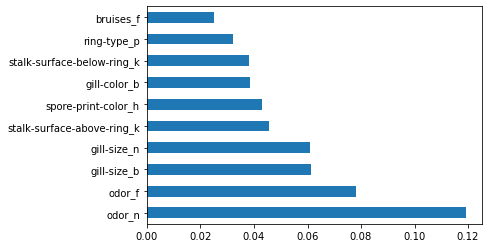

In [65]:
#en önemli 10 kolonu bulmamız gerekiyor.
feature_imp.nlargest(10).plot(kind="barh")

In [73]:
best_feat=feature_imp.nlargest(4).index
best_feat

Index(['odor_n', 'odor_f', 'gill-size_b', 'gill-size_n'], dtype='object')

In [76]:
X_Reduced= X_encoded[best_feat]
X_Reduced

,odor_n,odor_f,gill-size_b,gill-size_n
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,1,0,1,0
...,...,...,...,...
8119,1,0,1,0
8120,1,0,1,0
8121,1,0,1,0
8122,0,0,0,1


In [77]:
Xr_scaled=StandardScaler().fit_transform(X_Reduced)

In [78]:
Xr_scaled

array([[-0.87614155, -0.60180814, -1.49468272,  1.49468272],
       [-0.87614155, -0.60180814,  0.66903831, -0.66903831],
       [-0.87614155, -0.60180814,  0.66903831, -0.66903831],
       ...,
       [ 1.14136808, -0.60180814,  0.66903831, -0.66903831],
       [-0.87614155, -0.60180814, -1.49468272,  1.49468272],
       [ 1.14136808, -0.60180814,  0.66903831, -0.66903831]])

In [81]:
Xr_train, Xr_test, yr_train, yr_test= train_test_split(Xr_scaled, y_encoded, test_size=0.3, random_state=101)
print(f'Xr_Scaled: {Xr_scaled.shape} Xr_Train:{Xr_train.shape} Xr_Test:{Xr_test.shape} Yr_Test: {y_test.shape} yr_train: {yr_test.shape}')

Xr_Scaled: (8124, 4) Xr_Train:(5686, 4) Xr_Test:(2438, 4) Yr_Test: (2438,) yr_train: (2438,)


In [85]:
start=time.process_time()
modelr=RandomForestClassifier(n_estimators=700).fit(Xr_train, yr_train)
finish=time.process_time()
print(finish-start)

1.46875


In [86]:
predsr=modelr.predict(Xr_test)

In [87]:
print(confusion_matrix(yr_test, predsr))
print(classification_report(yr_test, predsr))

[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [94]:
X=data.drop(['class'],axis=1)
y=data['class']
X_encoded=pd.get_dummies(X,prefix_sep='_')
y_encoded=LabelEncoder().fit_transform(y)
X_encoded["class"]=y_encoded

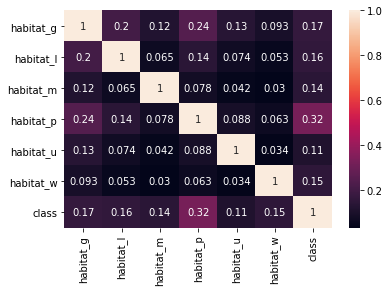

In [99]:
import seaborn as sns
#tüm dataframe correlation değerleri alalım. 
#.abs ile pozitif negatif de olsa yüksek corelation bakacağız.
sns.heatmap(X_encoded.iloc[:, -7:].corr().abs(), annot=True)

In [96]:
#sondan 7 column bakılıyor
X_encoded.iloc[:,-7:].corr()

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
habitat_g,1.000000,-0.202512,-0.115762,-0.242715,-0.130592,-0.093276,-0.165004
habitat_l,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553,0.155150
habitat_m,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087
class,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,1.000000


In [105]:
X_reduced_col_names=X_encoded.corr().abs()["class"].nlargest(10).index

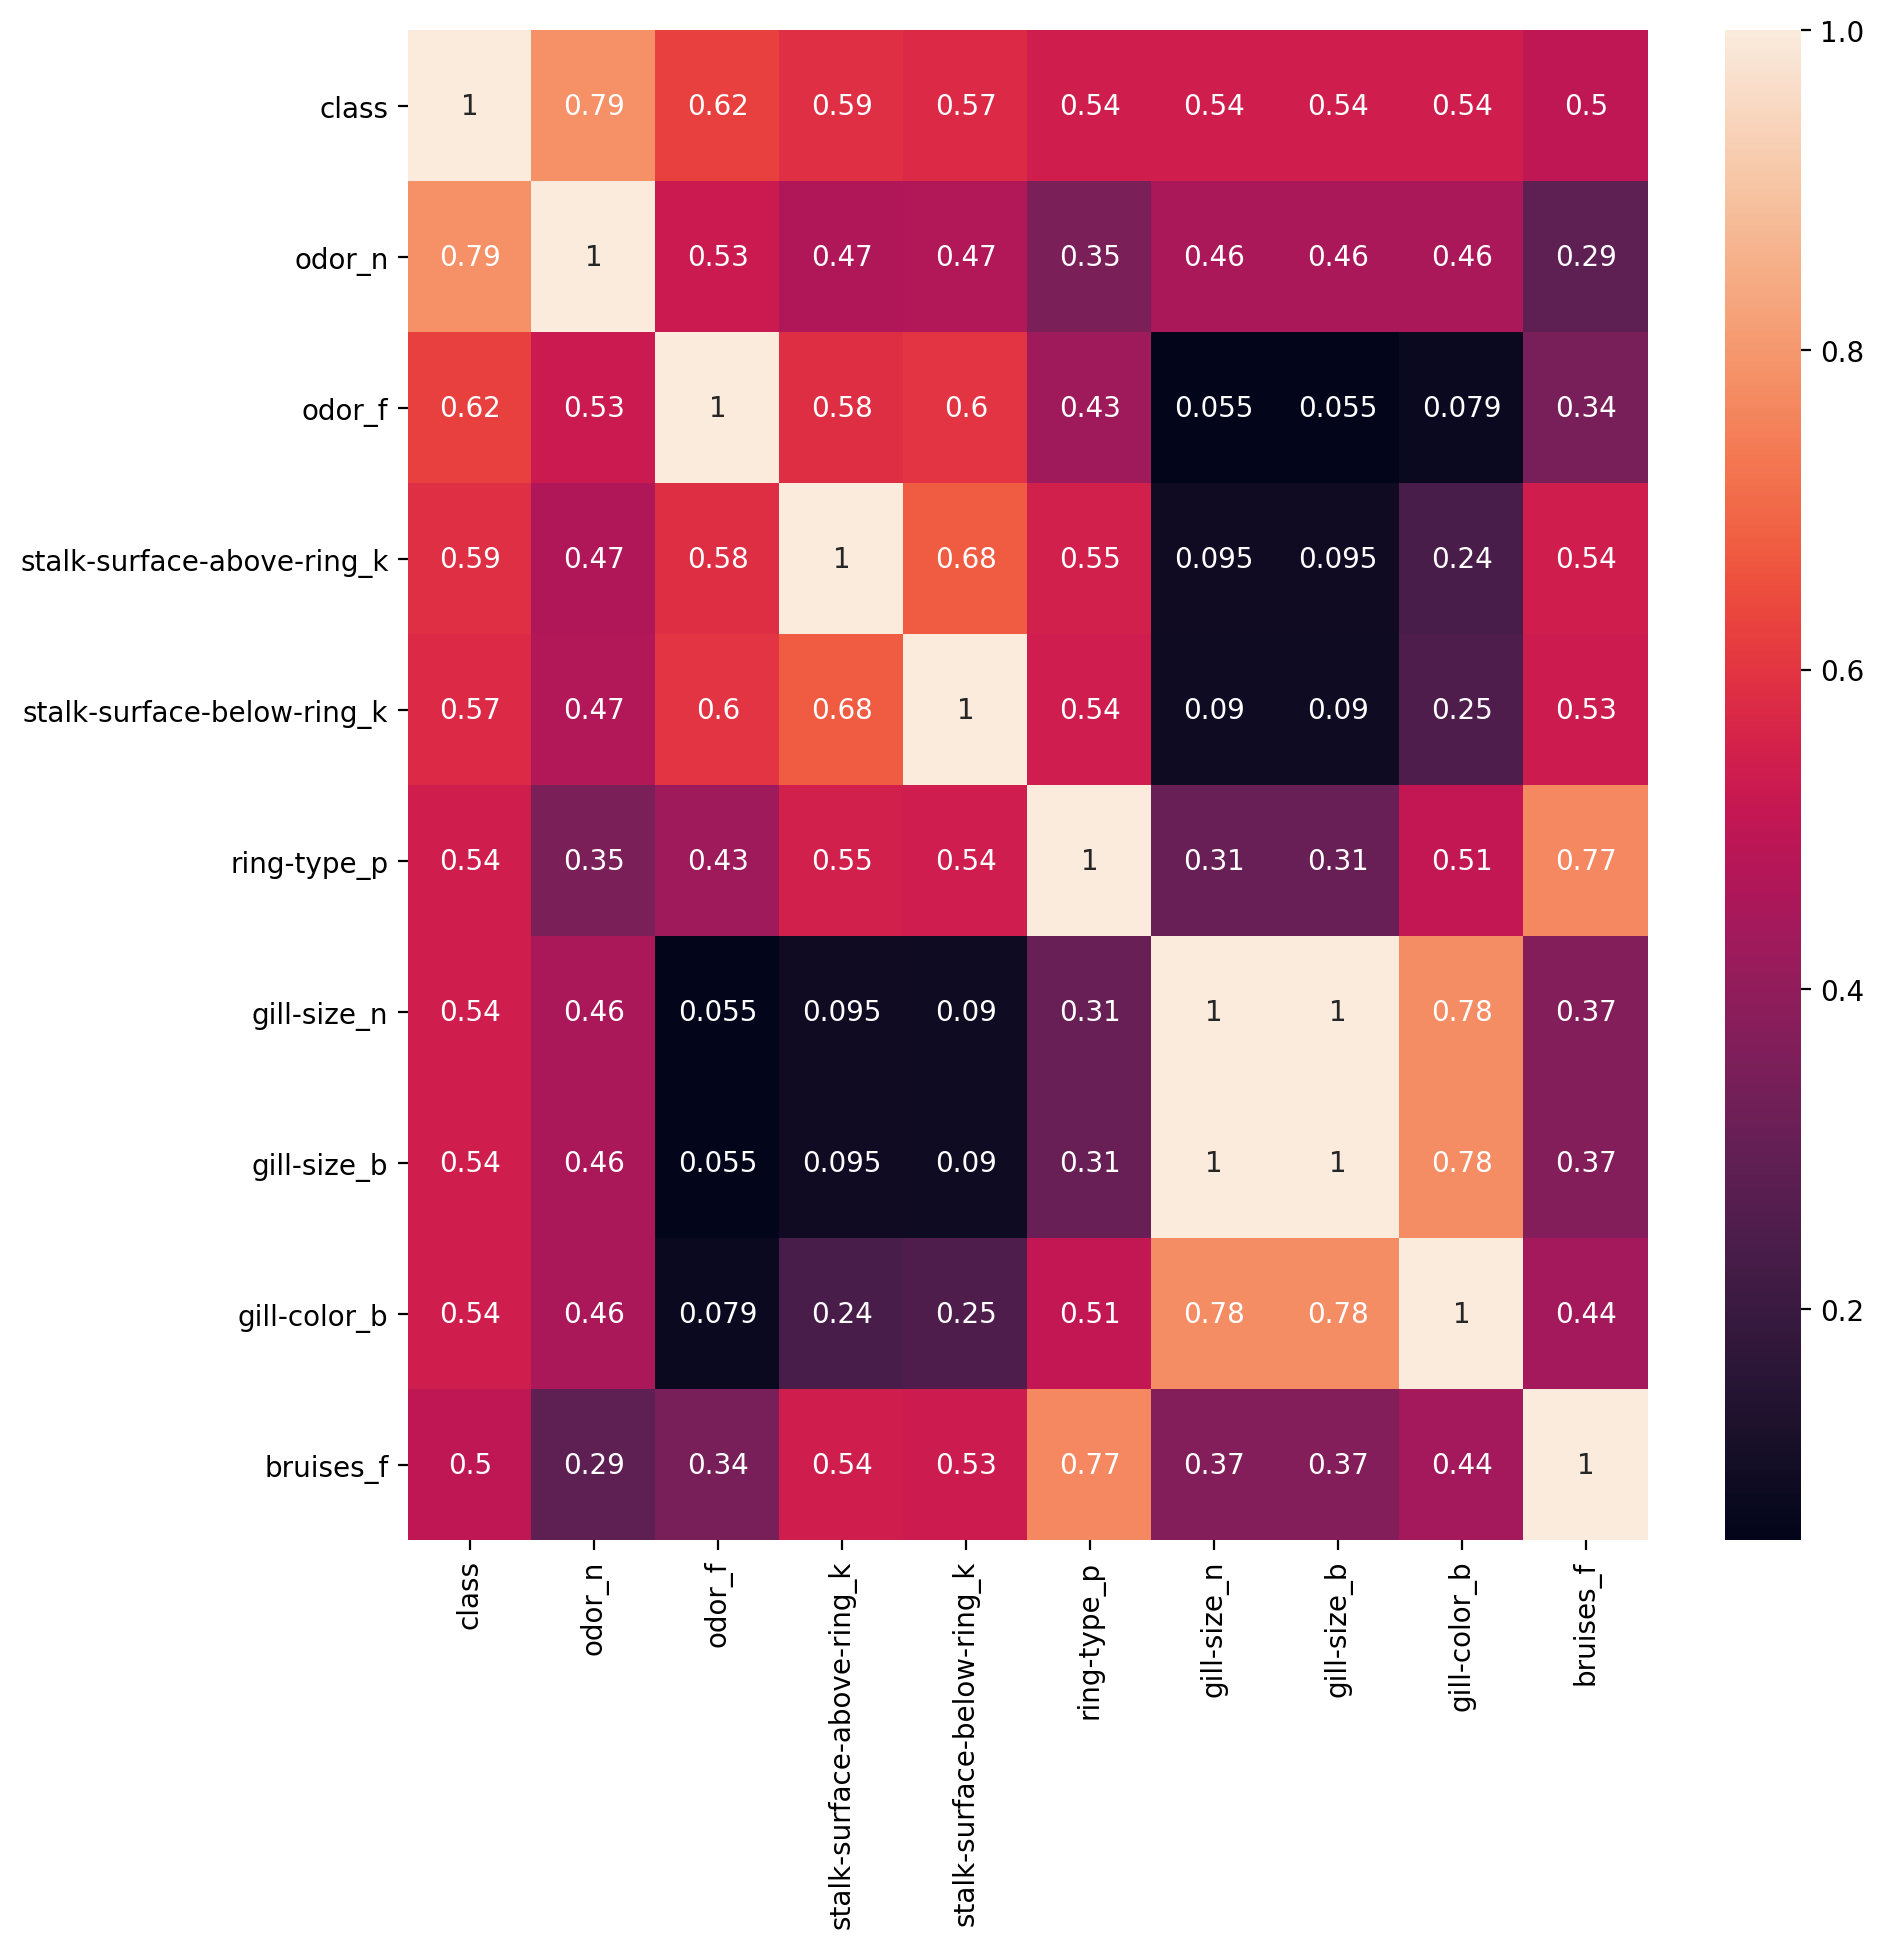

In [108]:
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(X_encoded[X_reduced_col_names].corr().abs(), annot=True)